In [1]:
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
file_prefix = ''
# Makes a lineplot with scalar x and statistics of vector y
def lineplot(x, y, y2=None, filename='', xaxis='Steps', yaxis='Return', title=''):
  y = np.array(y)
  y_mean, y_std = y.mean(axis=1), y.std(axis=1)
  sns.lineplot(x=x, y=y_mean, color='coral')
  plt.fill_between(x, y_mean - y_std, y_mean + y_std, color='coral', alpha=0.3)
  if y2:
    y2 = np.array(y2)
    y2_mean, y2_std = y2.mean(axis=1), y2.std(axis=1)
    sns.lineplot(x=x, y=y2_mean, color='b')
    plt.fill_between(x, y2_mean - y2_std, y2_mean + y2_std, color='b', alpha=0.3)

  plt.xlim(left=0, right=x[-1])
  plt.xlabel(xaxis)
  plt.ylabel(yaxis)
  plt.title(title)
  plt.plot()

def update_steps(metrics):
    # Get the train_steps list
    for key_steps in ['train_steps', 'test_steps']:
        train_steps = metrics[key_steps]

        # Find the index of the first zero
        previous = 0
        index = len(train_steps)
        for i, val in enumerate(train_steps):
            if val < previous:
                zero_index = i
                break
            previous = val
        # Get the last step before zero
        last_step_before_zero = train_steps[zero_index - 1] if zero_index > 0 else 0

        # Modify the train_steps list to continue the counter from 50 + last step before zero
        copy_steps = train_steps
        train_steps = train_steps[:zero_index] + [last_step_before_zero + copy_steps[i] for i in range(zero_index, len(train_steps))]
        # Update the train_steps list in the metrics dictionary
        metrics[key_steps] = train_steps
    return metrics

def load_stats(load_path):
    last_step = 1
    # Test if a "load" path is given as a config arg # load actor, critic, discriminator and metric from load path
    print("Loading model from path: ", load_path)
    # Path is load path + file_prefix + "_"last step number + ".pth"
    # Search for the last step number in the load path
    for file in os.listdir(load_path):
      if file.startswith(file_prefix) and file.endswith(".pth"):
          step = int(file.split("_")[-1].split(".")[0])
          if step > last_step:
              last_step = step
    print("Latest step number as source policy: ", last_step)
    metrics_path = load_path + "metrics" + "_" + str(last_step) + ".pth"
    metrics = torch.load(metrics_path)
    metrics = update_steps(metrics)
    return metrics

Loading model from path:  /home/lorangpi/Enigma/imitation_learning/outputs/GAIL_pick_place/07-16_20-14-53/
Latest step number as source policy:  110000


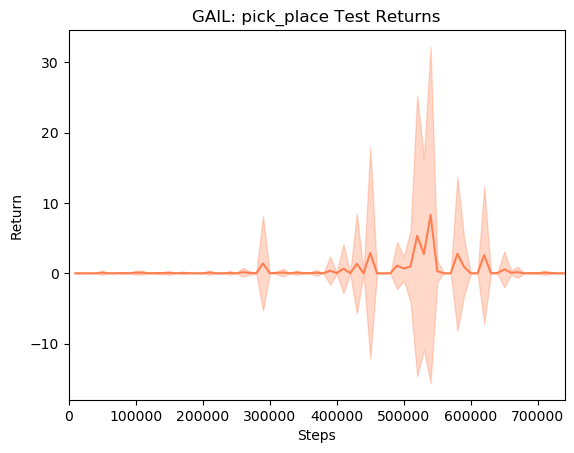

In [3]:
load_path = '/home/lorangpi/Enigma/imitation_learning/outputs/GAIL_pick_place/07-16_20-14-53/'
metrics = load_stats(load_path)
lineplot(metrics['test_steps'], metrics['test_returns'], filename=f"{file_prefix}test_returns", title=f'GAIL: pick_place Test Returns')

Loading model from path:  /home/lorangpi/Enigma/imitation_learning/outputs/GAIL_pick/07-16_20-04-00/
Latest step number as source policy:  70000


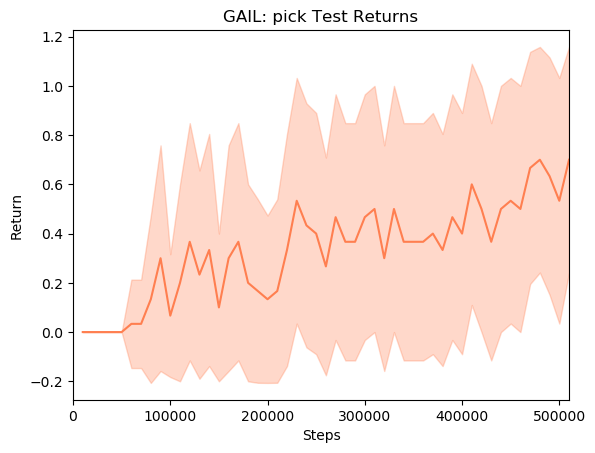

In [4]:
load_path = '/home/lorangpi/Enigma/imitation_learning/outputs/GAIL_pick/07-16_20-04-00/'
metrics = load_stats(load_path)
lineplot(metrics['test_steps'], metrics['test_returns'], filename=f"{file_prefix}test_returns", title=f'GAIL: pick Test Returns')

Loading model from path:  /home/lorangpi/Enigma/imitation_learning/outputs/GAIL_reach_pick/07-16_20-00-49/
Latest step number as source policy:  40000


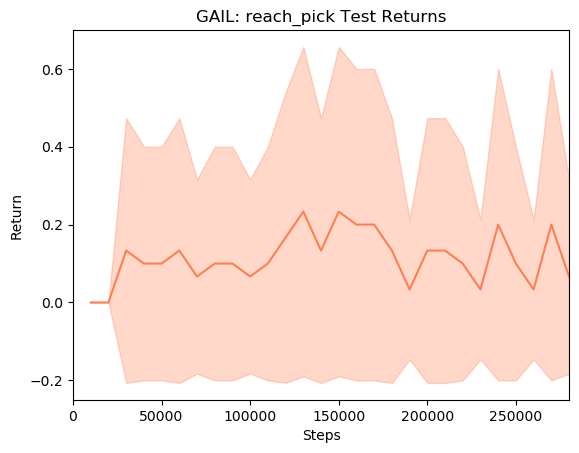

In [5]:
load_path = '/home/lorangpi/Enigma/imitation_learning/outputs/GAIL_reach_pick/07-16_20-00-49/'
metrics = load_stats(load_path)
lineplot(metrics['test_steps'], metrics['test_returns'], filename=f"{file_prefix}test_returns", title=f'GAIL: reach_pick Test Returns')

Loading model from path:  /home/lorangpi/Enigma/imitation_learning/outputs/GAIL_drop/07-16_20-00-48/
Latest step number as source policy:  30000


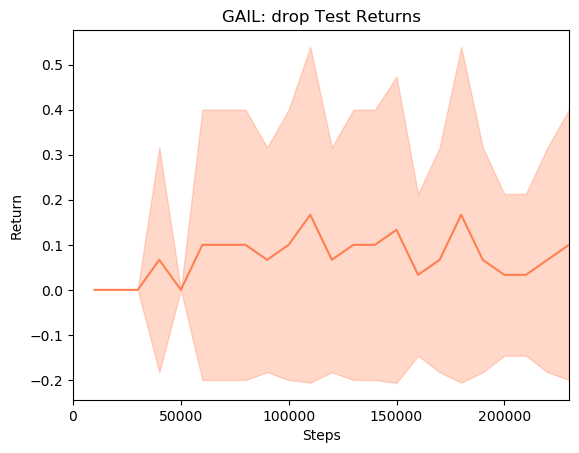

In [6]:
load_path = '/home/lorangpi/Enigma/imitation_learning/outputs/GAIL_drop/07-16_20-00-48/'
metrics = load_stats(load_path)
lineplot(metrics['test_steps'], metrics['test_returns'], filename=f"{file_prefix}test_returns", title=f'GAIL: drop Test Returns')

Loading model from path:  /home/lorangpi/Enigma/imitation_learning/outputs/GAIL_reach_drop/07-16_20-00-46/
Latest step number as source policy:  80000


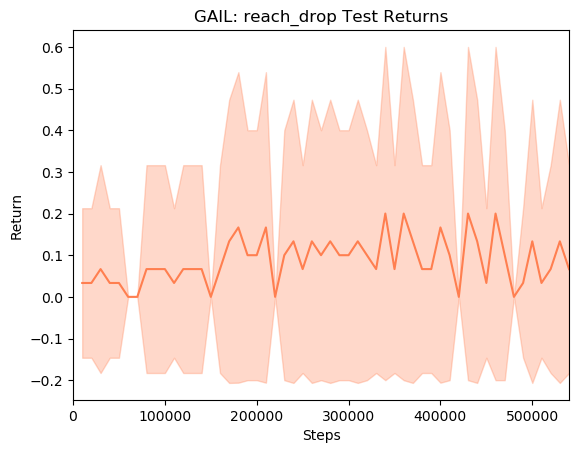

In [7]:
load_path = '/home/lorangpi/Enigma/imitation_learning/outputs/GAIL_reach_drop/07-16_20-00-46/'
metrics = load_stats(load_path)
lineplot(metrics['test_steps'], metrics['test_returns'], filename=f"{file_prefix}test_returns", title=f'GAIL: reach_drop Test Returns')